In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Jungle-book.txt to Jungle-book.txt


In [4]:
#Reading the data from the file and cleaning it.
file=open("Jungle-book.txt","r",encoding = "utf8" )
lines=[]

for i in file:
     lines.append(i)
data = ""
for i in lines:
    data = '  '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)

In [5]:
print(data)

In the jungles of India, an orphaned boy named Mowgli lives among a pack of wolves led by Akela. One day, during the dry season, the jungle animals gather to drink the remaining water as part of an ancient truce. The truce is disrupted when vicious Bengal tiger Shere Khan arrives and threatens to kill Mowgli at the end of the drought. After the drought ends, the wolves debate whether or not they should keep Mowgli. Mowgli decides to leave the jungle for the safety of his family, and Bagheera, a black panther, volunteers to guide him to the nearby "man-village". Shere Khan ambushes the pair on their way to the man-village, but Mowgli manages to escape and encounters the python Kaa, who hypnotizes him. While under her influence, Mowgli sees a vision of his father being killed by Shere Khan. Kaa attempts to devour Mowgli, but he is rescued by a brown bear named Baloo. Mowgli retrieves honey for Baloo as repayment and agrees to stay with him until the winter season arrives. Upon learning t

In [6]:
token=Tokenizer()
token.fit_on_texts([data]) #this  method updates the internal vocabulary (word index) of the Tokenizer based on the texts provided to it.
print(len(token.word_index))
token.word_index


252


{'the': 1,
 'mowgli': 2,
 'to': 3,
 'and': 4,
 'of': 5,
 'a': 6,
 'shere': 7,
 'khan': 8,
 'him': 9,
 'baloo': 10,
 'his': 11,
 'he': 12,
 'that': 13,
 'by': 14,
 'is': 15,
 'bagheera': 16,
 'jungle': 17,
 'in': 18,
 'pack': 19,
 'as': 20,
 'for': 21,
 'man': 22,
 'village': 23,
 'their': 24,
 'but': 25,
 'who': 26,
 'louie': 27,
 'fire': 28,
 'named': 29,
 'after': 30,
 'on': 31,
 'has': 32,
 'out': 33,
 'king': 34,
 'death': 35,
 'into': 36,
 'an': 37,
 'wolves': 38,
 'akela': 39,
 'during': 40,
 'season': 41,
 'truce': 42,
 'when': 43,
 'arrives': 44,
 'threatens': 45,
 'drought': 46,
 'not': 47,
 'decides': 48,
 'safety': 49,
 'kaa': 50,
 'while': 51,
 'under': 52,
 'being': 53,
 'agrees': 54,
 'with': 55,
 'learning': 56,
 'eventually': 57,
 'finds': 58,
 'humans': 59,
 'them': 60,
 'it': 61,
 'elephants': 62,
 'leader': 63,
 'all': 64,
 'from': 65,
 'temple': 66,
 "akela's": 67,
 'goes': 68,
 'torch': 69,
 'river': 70,
 'wolf': 71,
 'jungles': 72,
 'india': 73,
 'orphaned': 74,
 

In [7]:
input_sequences = []
for sentence in data.split("."):
  tokenized_sentence = token.texts_to_sequences([sentence.strip()])[0]
  #This method tokenizes the input text into a sequence of integers. The input is expected to be a list of texts.[0]: This indexing is used to retrieve the first (and only) sequence from the list returned by texts_to_sequences().
  # This is necessary because texts_to_sequences() returns a list of sequences, even though there's only one sentence in this case.
  print(tokenized_sentence)

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76, 77, 6, 19, 5, 38, 78, 14, 39]
[79, 80, 40, 1, 81, 41, 1, 17, 82, 83, 3, 84, 1, 85, 86, 20, 87, 5, 37, 88, 42]
[1, 42, 15, 89, 43, 90, 91, 92, 7, 8, 44, 4, 45, 3, 93, 2, 94, 1, 95, 5, 1, 46]
[30, 1, 46, 96, 1, 38, 97, 98, 99, 47, 100, 101, 102, 2]
[2, 48, 3, 103, 1, 17, 21, 1, 49, 5, 11, 104, 4, 16, 6, 105, 106, 107, 3, 108, 9, 3, 1, 109, 22, 23]
[7, 8, 110, 1, 111, 31, 24, 112, 3, 1, 22, 23, 25, 2, 113, 3, 114, 4, 115, 1, 116, 50, 26, 117, 9]
[51, 52, 118, 119, 2, 120, 6, 121, 5, 11, 122, 53, 123, 14, 7, 8]
[50, 124, 3, 125, 2, 25, 12, 15, 126, 14, 6, 127, 128, 29, 10]
[2, 129, 130, 21, 10, 20, 131, 4, 54, 3, 132, 55, 9, 133, 1, 134, 41, 44]
[135, 56, 13, 2, 32, 136, 1, 17, 7, 8, 137, 39, 4, 45, 1, 19, 3, 138, 2, 33]
[16, 57, 58, 2, 4, 10, 4, 15, 139, 13, 2, 32, 47, 140, 1, 59, 20, 12, 141, 142, 25, 10, 143, 9, 144, 4, 145, 146, 5, 60, 3, 147, 31, 61]
[40, 1, 148, 2, 58, 1, 149, 5, 62, 150, 151, 1, 152, 4, 153, 154, 3, 155, 24, 156]
[10, 157, 1

In [8]:
for sequence in input_sequences:
    print(sequence)


[18, 1]
[18, 1, 72]
[18, 1, 72, 5]
[18, 1, 72, 5, 73]
[18, 1, 72, 5, 73, 37]
[18, 1, 72, 5, 73, 37, 74]
[18, 1, 72, 5, 73, 37, 74, 75]
[18, 1, 72, 5, 73, 37, 74, 75, 29]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76, 77]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76, 77, 6]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76, 77, 6, 19]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76, 77, 6, 19, 5]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76, 77, 6, 19, 5, 38]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76, 77, 6, 19, 5, 38, 78]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76, 77, 6, 19, 5, 38, 78, 14]
[18, 1, 72, 5, 73, 37, 74, 75, 29, 2, 76, 77, 6, 19, 5, 38, 78, 14, 39]
[79, 80]
[79, 80, 40]
[79, 80, 40, 1]
[79, 80, 40, 1, 81]
[79, 80, 40, 1, 81, 41]
[79, 80, 40, 1, 81, 41, 1]
[79, 80, 40, 1, 81, 41, 1, 17]
[79, 80, 40, 1, 81, 41, 1, 17, 82]
[79, 80, 40, 1, 81, 41, 1, 17, 82, 83]
[79, 80, 40, 1, 81, 41, 1, 17, 82, 83, 3]
[79, 80, 40, 1, 81, 41, 1,

In [9]:
max_len = max([len(x) for x in input_sequences])
print(max_len)

39


In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequence= pad_sequences(input_sequences,maxlen=max_len,padding="pre")

In [11]:
padded_input_sequence

array([[  0,   0,   0, ...,   0,  18,   1],
       [  0,   0,   0, ...,  18,   1,  72],
       [  0,   0,   0, ...,   1,  72,   5],
       ...,
       [  0,   0,   0, ..., 252,  55,  10],
       [  0,   0,   0, ...,  55,  10,   4],
       [  0,   0,   0, ...,  10,   4,  16]], dtype=int32)

In [12]:
X=padded_input_sequence[:,:-1]
y=padded_input_sequence[:,-1]

In [13]:
X.shape

(515, 38)

In [14]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=253)

In [15]:
y.shape

(515, 253)

In [16]:
model=Sequential()
model.add(Embedding(253,100,input_length=max_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(253, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 38, 100)           25300     
                                                                 
 bidirectional (Bidirection  (None, 300)               301200    
 al)                                                             
                                                                 
 dense (Dense)               (None, 253)               76153     
                                                                 
Total params: 402653 (1.54 MB)
Trainable params: 402653 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 3s 231ms/step - loss: 2.4358 - accuracy: 0.3738 - val_loss: 2.3998 - val_accuracy: 0.3398
Epoch 2/100
13/13 [==============================] - 2s 134ms/step - loss: 2.2672 - accuracy: 0.4296 - val_loss: 2.4940 - val_accuracy: 0.3398
Epoch 3/100
13/13 [==============================] - 2s 129ms/step - loss: 2.1082 - accuracy: 0.4466 - val_loss: 2.5895 - val_accuracy: 0.3204
Epoch 4/100
13/13 [==============================] - 2s 129ms/step - loss: 1.9532 - accuracy: 0.4951 - val_loss: 2.6593 - val_accuracy: 0.2816
Epoch 5/100
13/13 [==============================] - 3s 207ms/step - loss: 1.8508 - accuracy: 0.5534 - val_loss: 2.7491 - val_accuracy: 0.2816
Epoch 6/100
13/13 [==============================] - 2s 148ms/step - loss: 1.7543 - accuracy: 0.5583 - val_loss: 2.8190 - val_accuracy: 0.2816
Epoch 7/100
13/13 [==============================] - 2s 128ms/step - loss: 1.6631 - accuracy: 0.6214 - val_loss: 2.8864 - val_accuracy: 0.3010

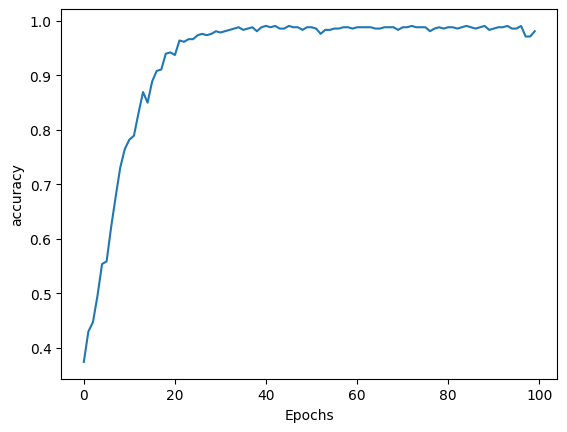

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')

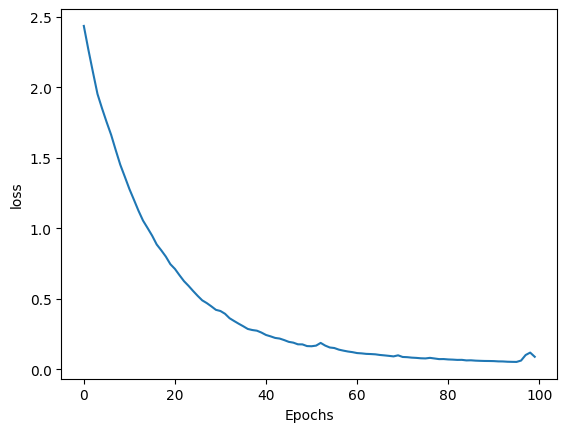

In [22]:
plot_graphs(history, 'loss')

In [23]:
import time
import numpy as np
text = "Shere Khan ambushes"

for i in range(13):
  # tokenize
  token_text = token.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=max_len-1, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in token.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 [==============================] - 1s 840ms/step
Shere Khan ambushes the
1/1 [==============================] - 0s 29ms/step
Shere Khan ambushes the pair
1/1 [==============================] - 0s 29ms/step
Shere Khan ambushes the pair on
1/1 [==============================] - 0s 31ms/step
Shere Khan ambushes the pair on their
1/1 [==============================] - 0s 55ms/step
Shere Khan ambushes the pair on their way
1/1 [==============================] - 0s 34ms/step
Shere Khan ambushes the pair on their way to
1/1 [==============================] - 0s 30ms/step
Shere Khan ambushes the pair on their way to the
1/1 [==============================] - 0s 30ms/step
Shere Khan ambushes the pair on their way to the man
1/1 [==============================] - 0s 31ms/step
Shere Khan ambushes the pair on their way to the man village
1/1 [==============================] - 0s 28ms/step
Shere Khan ambushes the pair on their way to the man village but
1/1 [==============================] - 0s

In [24]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
